In [30]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
iris = fetch_ucirepo(id=53) 
  
# data (as pandas dataframes) 
X = iris.data.features 
y = iris.data.targets 

In [31]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
 
#Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.2,
                                                    random_state = 4)
#Train the model with k = 10
k = 10
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)

#Predict the test set
yhat = neigh.predict(X_test)

#Print the accuracy score and classification error

print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Classification Error: ", 1 - metrics.accuracy_score(y_test, yhat))



Train set Accuracy:  0.9916666666666667
Classification Error:  0.033333333333333326


C:\Users\Nguyen Quang Huy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [38]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing

#Normalize the input dataset
X = preprocessing.StandardScaler().fit(X).transform(X)

#Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.2,
                                                    random_state = 4)

#Train the model and predict the test set
k = 10
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat = neigh.predict(X_test)


#Print the accuracy score, test set accuracy and classification error
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))
print("Classification Error: ", 1 - metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.975
Test set Accuracy:  0.9333333333333333
Classification Error:  0.06666666666666665


C:\Users\Nguyen Quang Huy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [37]:
#Apply PCA on the dataset
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)

#Apply KNN on the PCA transformed dataset
X_train, X_test, y_train, y_test = train_test_split(principalComponents,y,
                                                    test_size=0.2,
                                                    random_state = 4)   
k = 10
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat = neigh.predict(X_test)

#Print the accuracy score, test set accuracy and classification error
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))
print("Classification Error: ", 1 - metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.925
Test set Accuracy:  0.9666666666666667
Classification Error:  0.033333333333333326


C:\Users\Nguyen Quang Huy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
#Apply SVD on the dataset
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=2)
principalComponents = svd.fit_transform(X)

#Apply KNN on the SVD transformed dataset
X_train, X_test, y_train, y_test = train_test_split(principalComponents,y,
                                                    test_size=0.2,
                                                    random_state = 4)
k = 10
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat = neigh.predict(X_test)

#Print the accuracy score, test set accuracy and classification error
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))
print("Classification Error: ", 1 - metrics.accuracy_score(y_test, yhat))

C:\Users\Nguyen Quang Huy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nguyen Quang Huy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nguyen Quang Huy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d ar

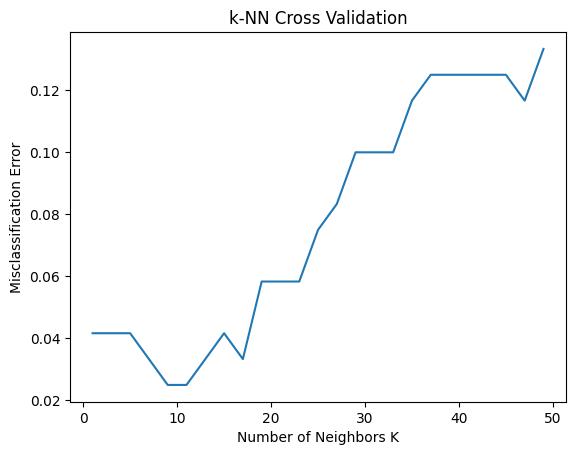

In [42]:
#improve the performance of k-nn with the help of k-cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import os

#Delete the file if it already exists
if os.path.exists('knn_cross.png'):
    os.remove('knn_cross.png')
#Create a list of k values
k_list = list(range(1,50,2))

#Create an empty list for cross validation scores
cv_scores = []

#Perform 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

#Plot the misclassification error versus k
error = [1 - x for x in cv_scores]
plt.plot(k_list, error)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.title('k-NN Cross Validation')
#Save the plot
plt.savefig('knn_cross.png')
plt.show()

In [43]:
#Apply leave-one-out and calculate the error of classification
from sklearn.model_selection import LeaveOneOut
import os
loo = LeaveOneOut()
loo.get_n_splits(X)

#Delete the file if it already exists
if os.path.exists('knn_leave_out.png'):
    os.remove('knn_leave_out.png')
#Create an empty list for cross validation scores
cv_scores = []

#Create a list of k values
k_list = list(range(1,50,2))
#Perform leave-one-out cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=loo, scoring='accuracy')
    cv_scores.append(scores.mean())

#Plot the misclassification error versus k
error = [1 - x for x in cv_scores]
plt.plot(k_list, error)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.title('Leave-One-Out Cross Validation')
#Save the plot
plt.savefig('knn_leave_out.png')
plt.show()

C:\Users\Nguyen Quang Huy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nguyen Quang Huy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nguyen Quang Huy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d ar

KeyboardInterrupt: 